 # Random Variables

In [ ]:
# --- IMPORTS ---
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import qmc

 ## Task 1
 $$I_K = (a I_{K-1} + c) \mod{m}$$

In [ ]:
def rand_gen(a: int, c: int, m: int, I_0: float, K: int) -> np.ndarray:
    rand_values: np.ndarray = np.zeros(K)
    rand_values[0] = I_0

    for i in range(1, K):
        rand_values[i] = (a * rand_values[i-1] + c) % m

    return rand_values

 ## Task 2
 Plot the distribution

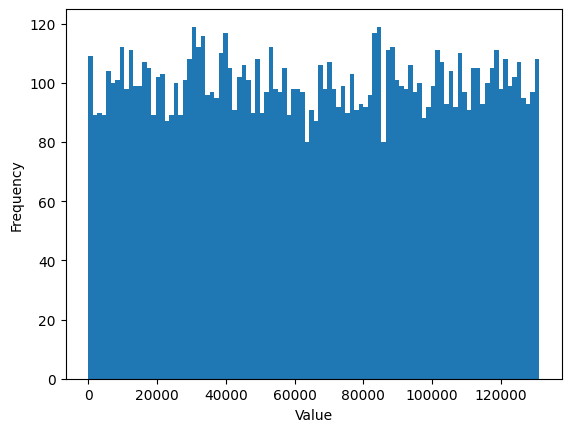

In [ ]:
random_values: np.ndarray = rand_gen(a=1277, c=0, m=131072, I_0=1.0, K=10_000)
plt.hist(random_values, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

 **What does the shape of the bar chart tell you?**

 The `random_values` have a **uniform distribution** between $0$ and $131,053$

 **What if ran your program again, do you get the same output? why/why not?**

 **Yes**, because the random generation is following a deterministic sequence.
 The remainders obtained will always follow the same sequence
 for the same initial values

 **What if you have more/fewer bins?**

 With fewer bins, the distribution appears more uniform on the histogram.
 With more bins, the distribution will appear less uniform on the histogram.

 ## Task 3
 Plot a scatter plot
 $$x=I_K, y=I_{K+1}$$

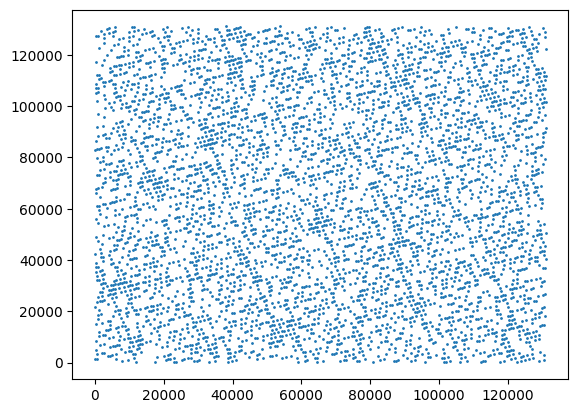

In [ ]:
x: np.ndarray = random_values[:-1:2]
y: np.ndarray = random_values[1::2]
plt.scatter(x, y, s=1)
plt.show()

 **What do you notice about the plot?**

 It has a **square** shape. This makes sense because
 we are plotting two uniform variables against each other.

 ## Task 4
 Comparing to `random.random()`

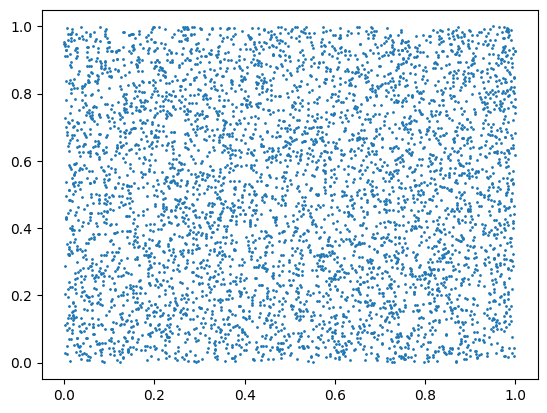

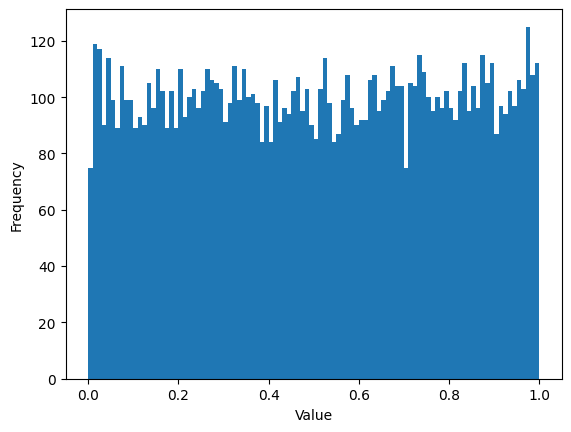

In [ ]:
random_values_2: np.ndarray = np.array(
    [random.random() for _ in range(10_000)])

x_2: np.ndarray = random_values_2[:-1:2]
y_2: np.ndarray = random_values_2[1::2]
plt.scatter(x_2, y_2, s=1)
plt.show()

plt.hist(random_values_2, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

 **Differences between the good & bad random generator**

 The bad one is predictable, given the same initial point the same values
 will be generated. The good one is unpredictable,
 it always changes each time.

 ## Task 5
 Comparing to `scipy.stats.qmc`

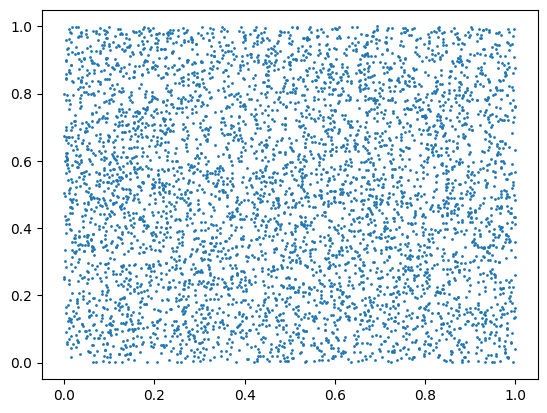

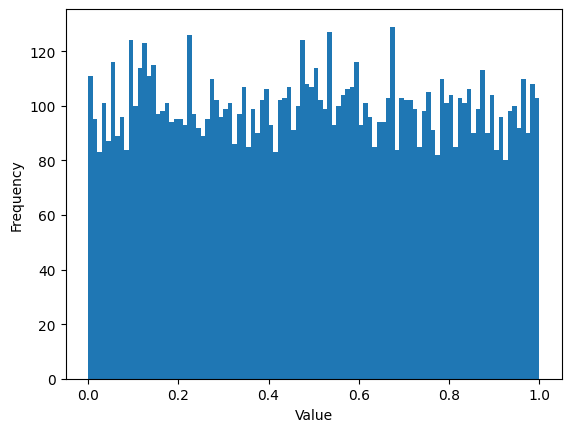

In [ ]:
sampler: qmc.Sobol = qmc.Sobol(d=10_000)
sample: np.ndarray = sampler.random().flatten()

x_3: np.ndarray = sample[:-1:2]
y_3: np.ndarray = sample[1::2]
plt.scatter(x_3, y_3, s=1)
plt.show()

plt.hist(sample, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

 ## Task 6
 Sampling from a number line $[a,b]$

In [ ]:
def rand_sample(a: int, b: int) -> float:
    r: float = random.random()
    return a + (b-a)*r

In [ ]:
# Generating distribution


def rand_gen_2(a: int, b: int, n: int) -> np.ndarray:
    rand_values: np.ndarray = np.zeros(n)

    for i in range(n):
        rand_values[i] = rand_sample(a, b)

    return rand_values

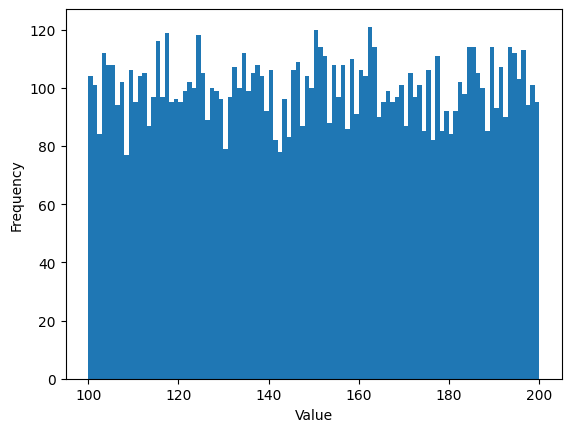

In [ ]:
# Plotting distribution
random_values_3: np.ndarray = rand_gen_2(a=100, b=200, n=10_000)
plt.hist(random_values_3, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

 This has the shape of a **uniform distribution** between $a=100$ and $b=200$.
 This is correct because it is stated the ball has an equal probability
 of being on any point between $a$ and $b$

 ## Task 6.1
 Sampling from photos of a projectile motion from the ground ($0$)
 to max height ($H$)

 We expect most photos to be of the ball at max height
 because it spends the most time there.

 $$v_y ∝ \sqrt{H-y}$$

 $$P ∝ \frac{1}{v_y}$$

 $$P(y) = \frac{C}{\sqrt{H-y}}$$

 $$\int_{0}^{H} P(y)dy = 1$$

 $$\int_{0}^{H} \frac{C}{\sqrt{H-y}}dy = 1$$

 $$C[-2\sqrt{H-y}]_{0}^{H} = 1$$

 $$2C\sqrt{H} = 1$$

 $$C = \frac{1}{2\sqrt{H}}$$

 $$r = \int_{0}^{y} \frac{1}{2\sqrt{H}} ⋅ \frac{1}{\sqrt{H-y}} dy$$

 $$r = \frac{1}{2\sqrt{H}} ⋅ [-2\sqrt{H-y}]_{0}^{y}$$

 $$r = \frac{1}{2\sqrt{H}} ⋅ [2\sqrt{H} - 2\sqrt{H-y})]$$

 $$r = 1 - \sqrt{1 - \frac{H-y}{H}}$$

 $$y = H[1 - (1-r)^2]$$

In [ ]:
def rand_sample_proj(H: float) -> float:
    r: float = random.random()
    return H * (1 - (1-r)**2)


def rand_gen_proj(H: float, n: int) -> np.ndarray:
    rand_values: np.ndarray = np.zeros(n)

    for i in range(n):
        rand_values[i] = rand_sample_proj(H)

    return rand_values

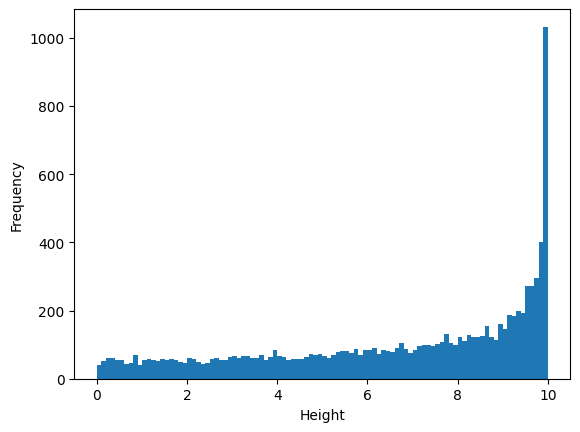

In [ ]:
# Plotting distribution
random_values_proj: np.ndarray = rand_gen_proj(H=10, n=10_000)
plt.hist(random_values_proj, bins=100)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

 This is correct because at the bottom (Height = 0) the ball is at max speed,
 too fast for the camera.

 At the top (Height = H) the ball slows down and stops for a split second